In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv('./datasets/student-mat.csv', sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data = data[ [ "G1", "G2", "G3", "studytime", "failures", "absences" ] ]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [4]:
predict = 'G3'

In [5]:
X = np.array(data.drop([predict], axis = 1)) # Features
y = np.array(data[predict]) # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [6]:
best_score = 0
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    linear = linear_model.LinearRegression()
    linear.fit(X_train, y_train)
    acc = linear.score(X_test, y_test)
    
    if acc > best_score:
        best_score = acc
        with open("studenmodel.pickle", "wb") as f:
            pickle.dump(linear, f)

In [8]:
pickle_in = open("studenmodel.pickle", 'rb')
linear = pickle.load(pickle_in)

In [9]:
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

-------------------------
Coefficient: 
 [ 0.17112739  0.9674973  -0.18033486 -0.30285804  0.04358698]
Intercept: 
 -1.6319494127701777
-------------------------


In [10]:
predicted = linear.predict(X_test)

In [13]:
for x in range(len(X_test)):
    print(predicted[x], X_test[x], y_test[x])

9.567975701438579 [10 10  2  0  4] 10
11.048855181526665 [13 11  2  0  4] 11
8.432571526597181 [8 9 2 0 8] 10
9.312894870289973 [ 8 10  2  0  6] 10
8.258223614859272 [8 9 2 0 4] 10
9.480801745569625 [10 10  2  0  2] 10
9.61765769227775 [ 8  9  1  1 38] 8
10.189997695753638 [ 9 11  2  0  0] 12
12.884871521548826 [14 12  2  0 20] 13
13.154977174158939 [14 13  2  0  4] 13
7.116378403559615 [8 8 2 0 0] 9
11.758051131710678 [12 12  2  0  2] 11
11.923191572840153 [13 12  3  0  6] 12
12.809501868912252 [13 13  2  0  0] 12
4.929523491516643 [5 6 2 0 6] 6
11.353794425541775 [12 12  4  0  1] 12
12.896675824781205 [13 13  2  0  2] 11
10.702410167121233 [13 11  2  1  3] 11
6.888890019725235 [ 9  7  2  1 20] 8
9.302887292049023 [11  9  1  1 19] 10
12.367814738714404 [14 12  1  0  4] 11
7.568554104277533 [7 9 2 2 6] 8
8.258223614859272 [8 9 2 0 4] 10
10.482678552457418 [11 11  3  0  3] 11
14.831670423904699 [13 15  2  0  2] 16
10.217590143067861 [12 10  2  1 18] 10
13.776999168473997 [13 14  2  0  0

No handles with labels found to put in legend.


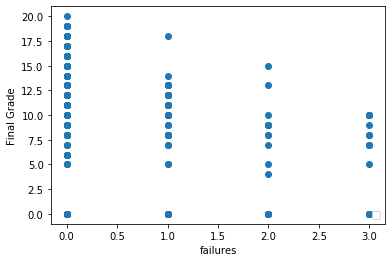

In [14]:
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()